In [12]:
#Nombre del hospital: Nombre del hospital. (Cadena)
#Dirección: Dirección postal del hospital. (Cadena)
#Ciudad: Ciudad donde se encuentra el hospital. (Cadena)
#Estado: Estado donde se encuentra el hospital. (Cadena)
#Código postal: Código postal del hospital. (Entero)
#Nombre del condado: Condado donde se encuentra el hospital. (Cadena)
#Número de teléfono: Número de teléfono del hospital. (Cadena)
#Nombre de la medida: Nombre de la métrica que se está estudiando. (Cadena)
#En comparación con la media nacional: Comparación de la métrica del hospital con la media nacional. (Cadena)
#Denominador: Número de pacientes utilizados para calcular la medida. (Entero)
#Puntuación: Matrices de ponderación basadas en calificaciones derivadas de otras métricas para facilitar la comparación. (Entero)
#Estimación inferior: Estimación inferior de la puntuación. (Entero)
#Estimación superior: Estimación superior de la puntuación. (Entero)
#Nota al pie: Información adicional sobre la métrica. (Cadena)
#Fecha de inicio de la medida: Fecha en la que se tomó la medida. (Fecha)
#Fecha de finalización de la medida: Fecha en la que finalizó la medida. (Fecha)
#Ubicación: Ubicación del hospital. (Cadena)

In [13]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install missingno
#!pip install seaborn
#!pip install scikit-learn

In [14]:
import os #Librería para verificar 
import pandas as pd #Librería para manejar el DataFrame
import missingno as msn #Librería para gestionar los valores nulos
import matplotlib.pyplot as plt #Librería para gráficar los resultados
import seaborn as sns

In [29]:
#Contiene registros de hospitales 
pathCSV = "Readmissions_and_Deaths_-_Hospital.csv"
assert  os.path.exists(pathCSV) #Verificamos la existencia del archivo.

In [16]:
df = pd.read_csv(pathCSV) #Variable para almacenar los datos del archivo.csv

In [17]:
df.info() #Obtenemos la información del DataFrame, con las columnas, el tipo de datos, la cantidad de datos NO nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 64764 non-null  int64 
 1   Provider ID           64764 non-null  int64 
 2   Hospital Name         64764 non-null  object
 3   Address               64764 non-null  object
 4   City                  64764 non-null  object
 5   State                 64764 non-null  object
 6   ZIP Code              64764 non-null  int64 
 7   County Name           64582 non-null  object
 8   Phone Number          64764 non-null  int64 
 9   Measure Name          64764 non-null  object
 10  Measure ID            64764 non-null  object
 11  Compared to National  64764 non-null  object
 12  Denominator           64764 non-null  object
 13  Score                 64764 non-null  object
 14  Lower Estimate        64764 non-null  object
 15  Higher Estimate       64764 non-null

In [18]:
#La suma de los valores nulos en cada columna del DataFrame
df.isna().sum().sort_values(ascending=False)

Footnote                41785
County Name               182
index                       0
Provider ID                 0
Address                     0
Hospital Name               0
State                       0
City                        0
Phone Number                0
Measure Name                0
Measure ID                  0
ZIP Code                    0
Compared to National        0
Denominator                 0
Lower Estimate              0
Score                       0
Higher Estimate             0
Measure Start Date          0
Measure End Date            0
Location                    0
dtype: int64

<Axes: >

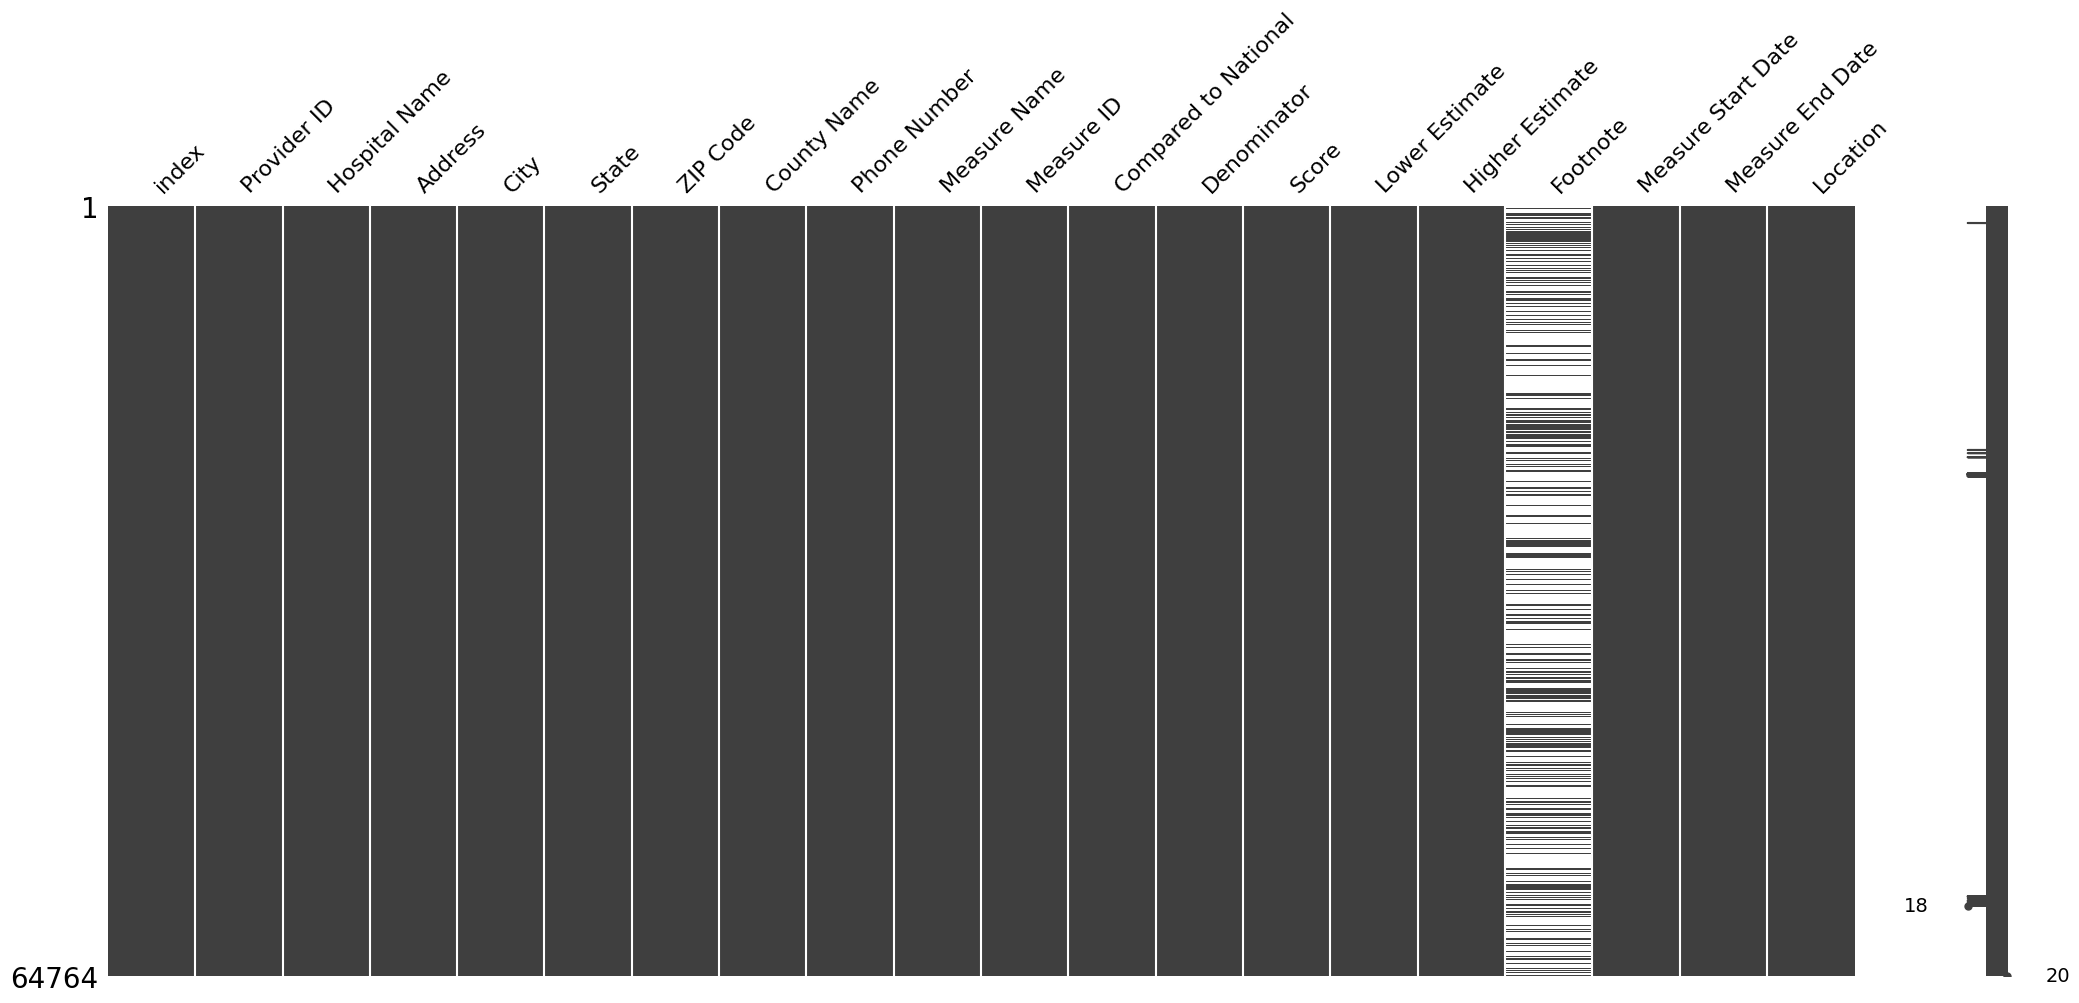

In [19]:
msn.matrix(df)

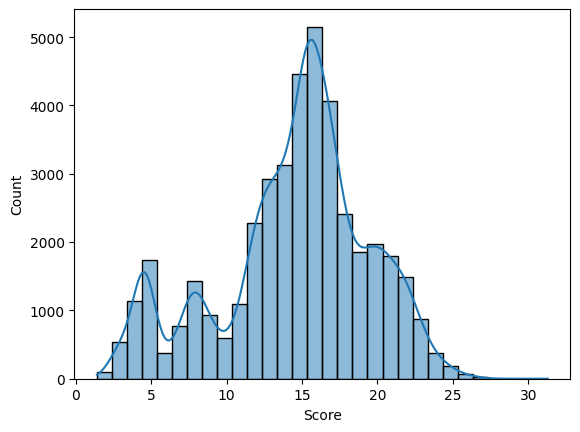

In [23]:
df['Score'] = pd.to_numeric(df['Score'], errors="coerce")
sns.histplot(df['Score'], kde=True, bins=30)
plt.show()

In [28]:
df['Score'] = pd.to_numeric(df['Score'], errors="coerce")
df.groupby("State")["Score"].mean().sort_values(ascending=False)
df["Measure Name"].value_counts()

Measure Name
Rate of readmission after discharge from hospital (hospital-wide)                4626
Rate of readmission after hip/knee replacement                                   4626
Pneumonia (PN) 30-Day Readmission Rate                                           4626
Rate of readmission for stroke patients                                          4626
Heart failure (HF) 30-Day Mortality Rate                                         4626
Pneumonia (PN) 30-Day Mortality Rate                                             4626
Death rate for chronic obstructive pulmonary disease (COPD) patients             4626
Heart failure (HF) 30-Day Readmission Rate                                       4626
Acute Myocardial Infarction (AMI) 30-Day Readmission Rate                        4626
Acute Myocardial Infarction (AMI) 30-Day Mortality Rate                          4626
Death rate for CABG                                                              4626
Death rate for stroke patients           